# tutorial to generate checkerbord cell simulation with an artbitray expression

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
import skimage
from sklearn.utils.random import sample_without_replacement
from scipy.sparse import csr_array

In [2]:
import sys


import simtissue
from simtissue.arbitrary_shape import checkerboard_mask, generate_ellipse, add_sphere_nuclei

from simtissue.plot import plot_contour
from simtissue.control_expression import create_fix_profile, simulate_arbritrary_expression
from simtissue.utils import get_dict_coord_map

### generate checkerboard 

list index out of range
no contour for cell 110.0


(<Figure size 500x500 with 1 Axes>, <AxesSubplot:>)

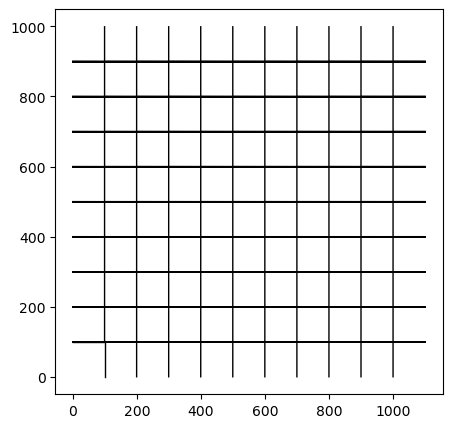

In [4]:
mask_cyto = checkerboard_mask(shape = [1, 1000, 1100],
                         cube_square_size = 100)
plot_contour(mask_cyto = mask_cyto, figsize = (5,5))

### add nuclei in the checcker board

list index out of range
no contour for cell 110.0
list index out of range
no contour for cell 110.0


(<Figure size 500x500 with 1 Axes>, <AxesSubplot:>)

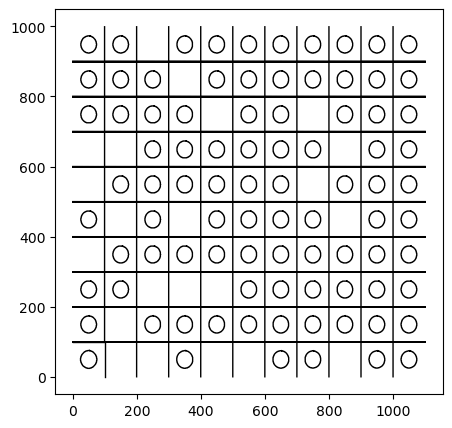

In [5]:

## leave 20% of the cells without cytoplasm
list_nuclei_unique = np.unique(mask_cyto)
index  = sample_without_replacement(len(list_nuclei_unique), int(0.80 * len(list_nuclei_unique)))
list_nuclei = list_nuclei_unique[index]
mask_nuclei = add_sphere_nuclei(mask_cyto = mask_cyto, 
                     cube_square_size  = 100,
                     nuclei_radius = 25,
                     list_nuclei = list_nuclei)

plot_contour(mask_cyto = mask_cyto, mask_nuclei = mask_nuclei, figsize = (5,5))


### simulation of arbitrary cell expression

-we fisrt simulate a cell-expression matrix containing the expression profile we want to map in the checkerboard

In [7]:
### generate_anndata


cell_index_typeA = [i for i in range(1, 111) if i % 2 == 0]
cell_index_typeB = [i for i in range(1, 111) if i % 2 == 1]

dict_profile = {'typeA': [50, 0],
                  'typeB': [0, 200]
             }
cell_type_distribution={'typeA': cell_index_typeA,
                        'typeB': cell_index_typeB,}

genes_list_to_simulate = ['A', 'B']
image_name = "image0"

anndata = simulate_arbritrary_expression(dict_profile,
                  cell_type_distribution,
                                         mask_cyto = mask_cyto,
        genes_list_to_simulate = ['A', 'B'],
        image_name = "image0"
        )
anndata

AnnData object with n_obs × n_vars = 110 × 2
    obs: 'image_name', 'genes', 'coordinate', 'cell_index'
    var: 'features'

#### plot of final simulation

list index out of range
no contour for cell 110.0
list index out of range
no contour for cell 110.0


(<Figure size 1500x1500 with 1 Axes>, <AxesSubplot:>)

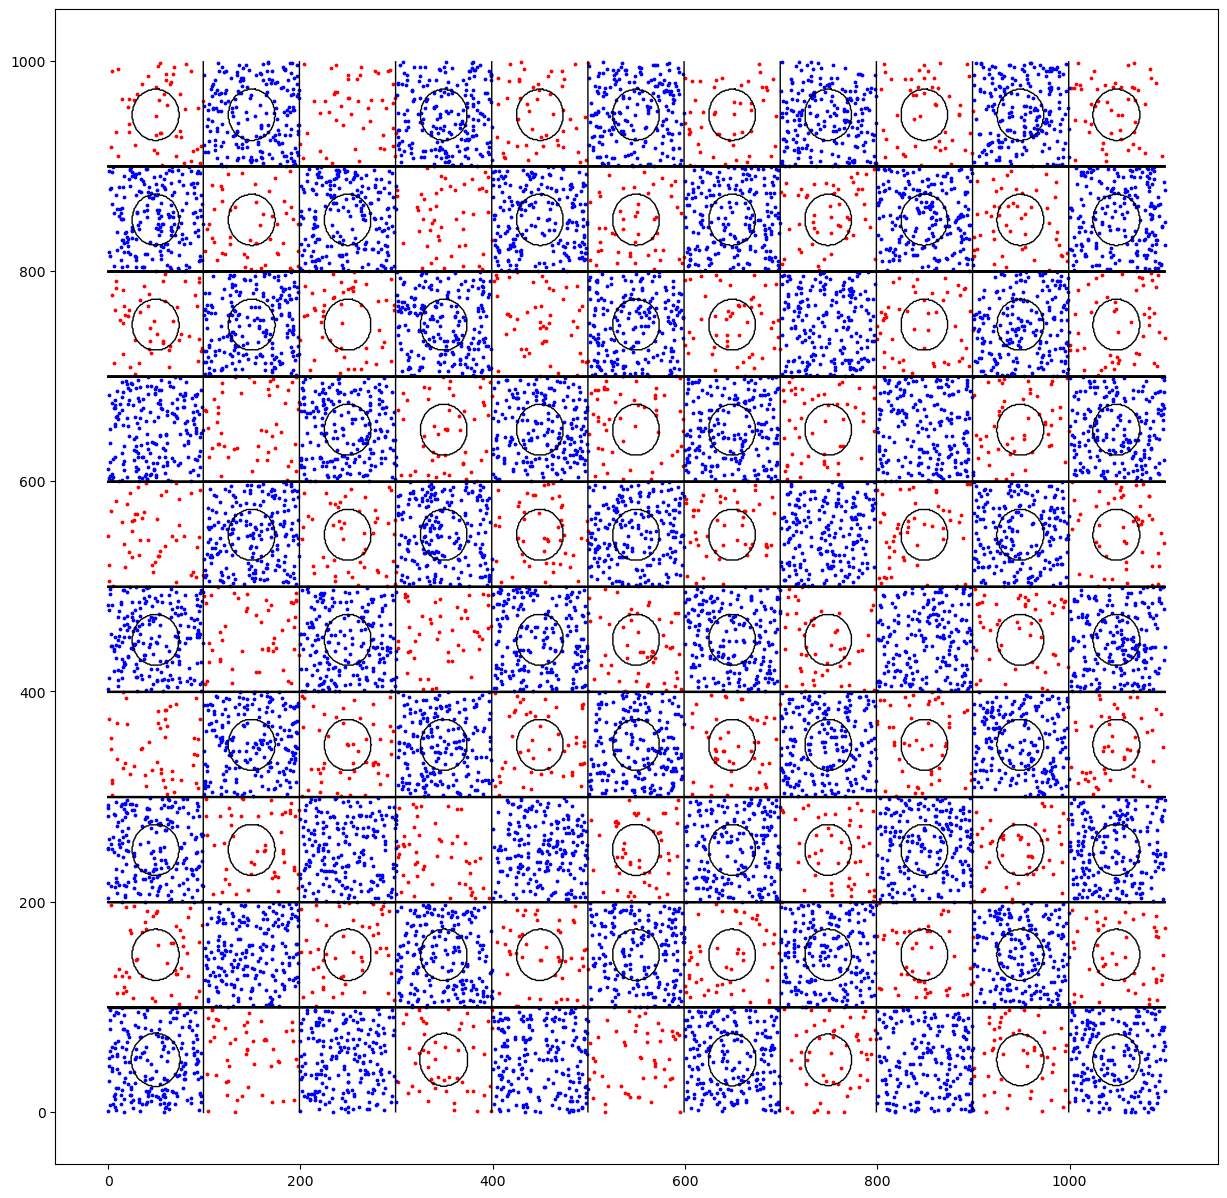

In [8]:
plot_contour(mask_cyto = mask_cyto,
                 mask_nuclei = mask_nuclei,
                 figsize = (15,15),
                anndata = anndata,
                dico_color = {"A" : "r", "B": "b"},
                spot_size = 3)